# Project #1
# Name: Nick Peters

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import sklearn
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

# load data
car_data = pd.read_csv('/content/drive/MyDrive/CS167 Datasets/CarPricesProject1.csv')
car_data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1.0,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1.0,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,NaN,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1.0,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145.0,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [3]:
#clean all of the data except for the two targets
car_data['symboling'].fillna(car_data['symboling'].mean(), inplace=True)
car_data['CarName'].fillna("null", inplace=True)
car_data['fueltype'].fillna("null", inplace=True)
car_data['aspiration'].fillna("null", inplace=True)
car_data['doornumber'].fillna("null", inplace=True)
car_data['drivewheel'].fillna("null", inplace=True)
car_data['enginelocation'].fillna("null", inplace=True)
car_data['wheelbase'].fillna(car_data['wheelbase'].mean(), inplace=True)
car_data['carlength'].fillna(car_data['carlength'].mean(), inplace=True)
car_data['carwidth'].fillna(car_data['carwidth'].mean(), inplace=True)
car_data['carheight'].fillna(car_data['carheight'].mean(), inplace=True)
car_data['curbweight'].fillna(car_data['curbweight'].mean(), inplace=True)
car_data['enginetype'].fillna("null", inplace=True)
car_data['enginesize'].fillna(car_data['enginesize'].mean(), inplace=True)
car_data['fuelsystem'].fillna("null", inplace=True)
car_data['boreratio'].fillna(car_data['boreratio'].mean(), inplace=True)
car_data['stroke'].fillna(car_data['stroke'].mean(), inplace=True)
car_data['compressionratio'].fillna(car_data['compressionratio'].mean(), inplace=True)
car_data['horsepower'].fillna(car_data['horsepower'].mean(), inplace=True)
car_data['peakrpm'].fillna(car_data['peakrpm'].mean(), inplace=True)
car_data['citympg'].fillna(car_data['citympg'].mean(), inplace=True)
car_data['highwaympg'].fillna(car_data['highwaympg'].mean(), inplace=True)
car_data.isna().any()

symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody              True
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber       True
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price                True
dtype: bool

In [4]:
#drop the specific car name and keep the brand name
for x in range(len(car_data['CarName'])):
  end = car_data['CarName'].iloc[x].find(" ")
  car_data['CarName'].iloc[x] = car_data['CarName'].iloc[x][:end]

#replace cylindernumber with numeric values
car_data['cylindernumber'].replace(['two','three','four','five','six','eight','twelve'], [2,3,4,5,6,8,12], inplace=True)
car_data['cylindernumber'].fillna(car_data['cylindernumber'].mean(), inplace=True)

#columns which need one-hot encoding: CarName, fueltype, aspiration, doornumber, drivewheel, enginelocation, enginetype, fuelsystem
car_data = pd.get_dummies(car_data, columns=["CarName","fueltype","aspiration","doornumber","drivewheel","enginelocation","enginetype","fuelsystem"])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
#clean carbody and drop nan in price for the regression problem
reg_car_data = car_data.copy()
reg_car_data['carbody'].fillna(reg_car_data['carbody'].mode()[0], inplace=True)
reg_car_data.dropna(subset=['price'], inplace=True)
reg_car_data = pd.get_dummies(reg_car_data, columns=["carbody"]) #carbody needs one-hot encoding

#clean price and drop nan in carbody for the classification problem
class_car_data = car_data.copy()
class_car_data['price'].fillna(class_car_data['price'].mean(), inplace=True)
class_car_data.dropna(subset=['carbody'], inplace=True)

In [6]:
#split regression data
reg_target = 'price'
reg_predictors = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg',
       'CarName_Nissan','CarName_alfa-romero','CarName_audi','CarName_bmw', 'CarName_buick','CarName_chevrolet','CarName_dodge','CarName_honda','CarName_isuzu','CarName_jaguar','CarName_maxda',
       'CarName_mazda','CarName_mercury','CarName_mitsubishi','CarName_nissan','CarName_peugeot','CarName_plymouth','CarName_porcshce','CarName_porsche','CarName_renault','CarName_saab','CarName_subar','CarName_subaru','CarName_toyota',
       'CarName_vokswagen','CarName_volkswagen','CarName_volvo','CarName_vw','fueltype_diesel','fueltype_gas','aspiration_std','aspiration_turbo','doornumber_four','doornumber_two','drivewheel_4wd','drivewheel_fwd','drivewheel_rwd',
       'enginelocation_front','enginelocation_rear','enginetype_dohc','enginetype_dohcv','enginetype_l','enginetype_ohc','enginetype_ohcf','enginetype_ohcv','enginetype_rotor','fuelsystem_1bbl','fuelsystem_2bbl','fuelsystem_4bbl','fuelsystem_idi',
       'fuelsystem_mfi','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','carbody_convertible','carbody_hardtop','carbody_hatchback','carbody_sedan','carbody_wagon']
rtrain, rtest, rtrain_sln, rtest_sln = \
    train_test_split(reg_car_data[reg_predictors], reg_car_data[reg_target], test_size=0.3, random_state=32)

#split classification data
class_target = 'carbody'
class_predictors = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg',
       'price','CarName_Nissan','CarName_alfa-romero','CarName_audi','CarName_bmw','CarName_buick','CarName_chevrolet','CarName_dodge','CarName_honda','CarName_isuzu','CarName_jaguar','CarName_maxda',
       'CarName_mazda','CarName_mercury','CarName_mitsubishi','CarName_nissan','CarName_peugeot','CarName_plymouth','CarName_porcshce','CarName_porsche','CarName_renault','CarName_saab','CarName_subar','CarName_subaru','CarName_toyota',
       'CarName_vokswagen','CarName_volkswagen','CarName_volvo','CarName_vw','fueltype_diesel','fueltype_gas','aspiration_std','aspiration_turbo','doornumber_four','doornumber_two','drivewheel_4wd','drivewheel_fwd','drivewheel_rwd',
       'enginelocation_front','enginelocation_rear','enginetype_dohc','enginetype_dohcv','enginetype_l','enginetype_ohc','enginetype_ohcf','enginetype_ohcv','enginetype_rotor','fuelsystem_1bbl',
       'fuelsystem_2bbl','fuelsystem_4bbl','fuelsystem_idi','fuelsystem_mfi','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi']
ctrain, ctest, ctrain_sln, ctest_sln = \
    train_test_split(class_car_data[class_predictors], class_car_data[class_target], test_size=0.1, random_state=32)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#normalize regression data
scaler.fit(rtrain)
norm_rtrain = scaler.transform(rtrain)
norm_rtest = scaler.transform(rtest)

#normalize classification data
scaler.fit(ctrain)
norm_ctrain = scaler.transform(ctrain)
norm_ctest = scaler.transform(ctest)

# Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments - creation of dummy variables, filling in missing values, etc.

>For filling in missing values, I filled in categorical categories with "null" for missing values. By doing this, it creates a separate category when doing one hot encoding, which allows the algorithms to learn from those training examples. The only categorical predictor that I do not do this for is "cylindernumber" because I change those values into their corresponding numeric values. At first, I replaced missing categorical data with the mode of that column. Later, I came to the realization that, by doing such a thing, I would most likely just be adding a bunch of noise to the dataset. For numeric categories, I filled in missing values with the average for that column. This is a standard practice that we have used throughout the course, so I believe that this is a good practice in this project.

>With "cylindernumber" a numberical category, I used one hot encoding on the rest of the categorical categories, including "CarName". In its original state, CarName would have created many unnecessary categories which would not be useful during the training process. Before using one hot encoding, I use a for loop to run through every CarName predictor of every training example. For each example, I set the predictor to the first slice of the string. Essentially, what this does is replace the specific car name with the name of the brand. This works because the naming convention of cars means that the brand name is always first.

>Because this project includes both a classification problem and a regression problem, there are two targets in the original data. When cleaning the data, I was unable to clean "carbody" and "price" as those are, respectively, the classification and regression targets. To properly complete this project, I needed to create two different datasets, one where carbody was the only target and on where price was the only target. With that established, I was able to clean the other category in each dataset which was not the target. For the regression problem, I not only needed to clean carbody, but also use one hot encoding on it due to its categorical nature. Lastly, I dropped any missing values in each dataset for both targets. This is important because filling missing values with the average would mess up and create noise during training.

>Before my datasets were ready to be used during training, the last thing that I did was split the datasets into training and testing sets. With the datasets split, I was able to normalize. This is important because, without normalization, some of the very large numerical categories, such as curbweight would heavily influence the decision of any k-nearest neighbors (knn) models. For decision trees, normalization will not have any effect. 





# Part 1: Regression
How well can you predict target value `price`?

- **Metrics**: Identify which metrics you will be using to test your model, and say why they are appropriate. Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly?

For regression, the options for metrics indluce absolute error, mean-squared error, and r^2. For this investigation, I will be using r^2. R^2 is a measurement of error that is based on if you always guessed the average. Since guessing the average is a naive method of prediction, I should be able to do better than it. If I end up just guesing the average, the r^2 value will signify it since the value will equal 0. If I guess better than the average, the r^2 value will be positive. A 1 will indicate that my model perfectlty fits the data. If my any of my models end up guessing randomly, it may end up performing worse than the average, meaning that the r^2 value will end up negative.

- **Initial Models**: Develop basic code for kNN, weighted kNN, and Decision Trees. Make some experiments here, including graphs to help you identify which algorithm and parameters may be best.

>As seen from the graphs below, all of the models performed well. As was expected, as the number of points increased, the performance of the kNN and weighted kNN decreased. Interestingly, increasing the depth of the decision tree had widly different results. It changed at the beginning, but then hit a lower plateau. The decision tree ended up outperforming the kNN models when it can to the max r^2 they were able to achieve. Because of this, I will focus on finetuning the decision tree in the next

Max: 2 0.8912963652183205


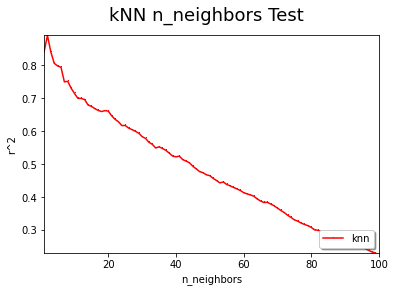

In [8]:
from sklearn import neighbors
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

#knn

number_of_points = 100
predictions = []
peak = -1
peak_num = 0

for x in range(1,number_of_points):
  reg_knn = neighbors.KNeighborsRegressor(n_neighbors=x)
  reg_knn.fit(norm_rtrain, rtrain_sln)
  val = reg_knn.predict(norm_rtest)
  predictions.append(metrics.r2_score(rtest_sln, val))
  if(metrics.r2_score(rtest_sln, val) > peak):
    peak = metrics.r2_score(rtest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)

xvals = range(1,number_of_points)
plt.suptitle('kNN n_neighbors Test',fontsize=18)
plt.xlabel('n_neighbors')
plt.ylabel('r^2')
plt.plot(xvals,predictions,'r,-',label='knn')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

Max 2 0.887609613697985


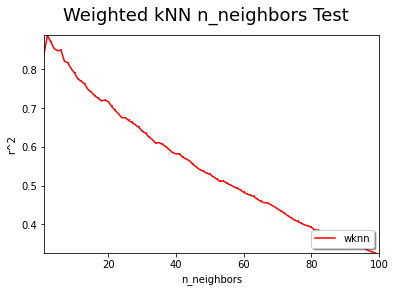

In [9]:
#weighted knn

number_of_points = 100
predictions = []
peak = -1
peak_num = 0

for x in range(1,number_of_points):
  reg_wknn = neighbors.KNeighborsRegressor(n_neighbors=x, weights='distance')
  reg_wknn.fit(norm_rtrain, rtrain_sln)
  val = reg_wknn.predict(norm_rtest)
  predictions.append(metrics.r2_score(rtest_sln, val))
  if (metrics.r2_score(rtest_sln, val) > peak):
    peak = metrics.r2_score(rtest_sln, val)
    peak_num=x

print("Max",peak_num, peak)

xvals = range(1,number_of_points)
plt.suptitle('Weighted kNN n_neighbors Test',fontsize=18)
plt.xlabel('n_neighbors')
plt.ylabel('r^2')
plt.plot(xvals,predictions,'r,-',label='wknn')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

Max: 8 0.9067316528523198


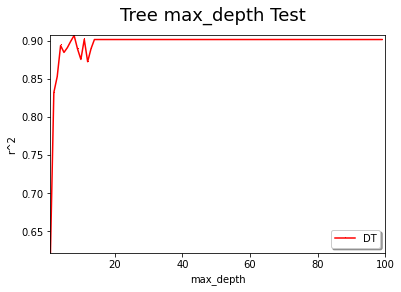

In [27]:
#decision tree

number_of_points = 100
predictions = []
peak = -1
peak_num = 0

for x in range(1,number_of_points):
  reg_dt = tree.DecisionTreeRegressor(random_state=35, max_depth=x)
  reg_dt.fit(norm_rtrain, rtrain_sln)
  val = reg_dt.predict(norm_rtest)
  predictions.append(metrics.r2_score(rtest_sln, val))
  if(metrics.r2_score(rtest_sln, val) > peak):
    peak = metrics.r2_score(rtest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)

xvals = range(1,number_of_points)
plt.suptitle('Tree max_depth Test',fontsize=18)
plt.xlabel('max_depth')
plt.ylabel('r^2')
plt.plot(xvals,predictions,'r,-',label='DT')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

#messing with division of training and testing
#test_size=0.1 Max: 9 0.6938599714580174
#test_size=0.2 Max: 7 0.8733835325310135
#test_size=0.3 Max: 8 0.9067316528523198
#test_size=0.4 Max: 6 0.840967364684802


- **Fine Tuning**: Create graphs to help you identify the **optimal** values of parameters you wish to use. Utilize different train/test splits. Full credit for thorough testing and documentation.


###The following section will be devoted to finetuning the decision tree model
####Findings:


test_size=0.3 without "absolute_error"

---

r^2_score: 0.9305633569907147

---

final settings: random_state=35, max_depth=8, min_samples_split=2, max_leaf_nodes=55, max_features=12

---


In [11]:
#as found before, with a random_state of 35, max_depth of 7 achieves the highest performance
#testing different options for criterion

crit_options= ["squared_error", "friedman_mse", "absolute_error", "poisson"]
predictions = []

for x in range(len(crit_options)):
  reg_dt = tree.DecisionTreeRegressor(random_state=35, max_depth=8, criterion=crit_options[x])
  reg_dt.fit(norm_rtrain, rtrain_sln)
  val = reg_dt.predict(norm_rtest)
  predictions.append(metrics.r2_score(rtest_sln, val))

print(predictions)
#[0.8733835325310135, 0.8733835325310135, 0.7378988041083105, 0.4360728510446321] 
#squared_error works fine, so it will stay as the default.

#test_size=0.3 
#[0.9067316528523198, 0.9067316528523198, 0.9146885581721546, 0.6303227965029319]
#absolute_error achieves best results

[0.9067316528523198, 0.9067316528523198, 0.9146885581721546, 0.6303227965029319]


In [12]:
#splitter vs random

split = ["best", "random"]
predictions = []

for x in range(len(split)):
  reg_dt = tree.DecisionTreeRegressor(random_state=35, max_depth=7, splitter=split[x])
  reg_dt.fit(norm_rtrain, rtrain_sln)
  val = reg_dt.predict(norm_rtest)
  predictions.append(metrics.r2_score(rtest_sln, val))

print(predictions)
#[0.8733835325310135, 0.44460668577134754] 
#"best" works best

#test_size=0.3 
#"best" still works best

[0.8991105902593394, 0.8271168087644021]


Max: 2 0.9067316528523198


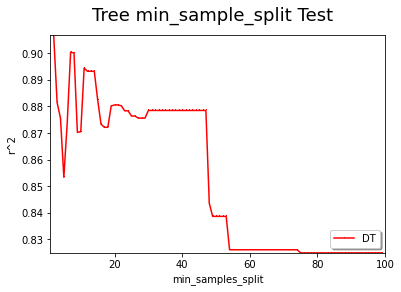

In [13]:
#finetuning min_samples_split
number_of_points = 100
predictions = []
peak = -1
peak_num = 0

for x in range(2,number_of_points):
  reg_dt = tree.DecisionTreeRegressor(random_state=35, max_depth=8, min_samples_split=x)
  reg_dt.fit(norm_rtrain, rtrain_sln)
  val = reg_dt.predict(norm_rtest)
  predictions.append(metrics.r2_score(rtest_sln, val))
  if(metrics.r2_score(rtest_sln, val) > peak):
    peak = metrics.r2_score(rtest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)

xvals = range(2,number_of_points)
plt.suptitle('Tree min_sample_split Test',fontsize=18)
plt.xlabel('min_samples_split')
plt.ylabel('r^2')
plt.plot(xvals,predictions,'r,-',label='DT')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()
#Max: 9 0.8840859021090348 
#min_samples_split=9 achieves the highest r^2

#test_size=0.3 
#Max: 2 0.9146885581721546

Max: 1 0.9067316528523198
[0.9067316528523198, 0.8789582685662453, 0.8747978344049859, 0.86359167684255, 0.8501405150751762, 0.8555329422664044, 0.873492644581993, 0.876490225460328, 0.8710888440495297, 0.8412058079278442, 0.8465479033870811, 0.8464361072462114, 0.853207521196383, 0.8485644708122349, 0.8485644708122349, 0.61628806809782, 0.6076519519146044, 0.6096036382946086, 0.5899098202485409, 0.5540568717820801, 0.5540568717820801, 0.5540568717820801, 0.5817834570846958, 0.5815299379187406, 0.5765989728458812, 0.5765989728458812, 0.5745257135386034, 0.5745257135386034, 0.5754638311862752, 0.5765882623577869, 0.5797469601262282, 0.5392017302326395, 0.5392017302326395, 0.5392017302326395, 0.5392017302326395, 0.4878127236274764, 0.48944807604948937, 0.48944807604948937, 0.48944807604948937, 0.48944807604948937, 0.48944807604948937, 0.4859943213164357, 0.486723887227534, 0.48862560453586823, 0.4885538780209394, 0.4885538780209394, 0.4885538780209394, 0.4885538780209394, 0.4885538780209

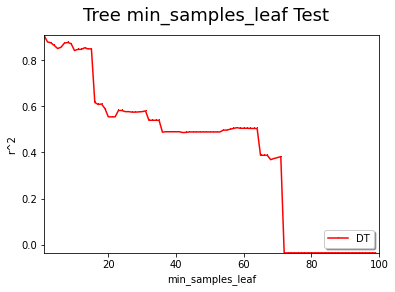

In [14]:
#finetuning min_samples_leaf
number_of_points = 100
predictions = []
peak = -1
peak_num = 0

for x in range(1,number_of_points):
  reg_dt = tree.DecisionTreeRegressor(random_state=35, max_depth=8, min_samples_split=2, min_samples_leaf=x)
  reg_dt.fit(norm_rtrain, rtrain_sln)
  val = reg_dt.predict(norm_rtest)
  predictions.append(metrics.r2_score(rtest_sln, val))
  if(metrics.r2_score(rtest_sln, val) > peak):
    peak = metrics.r2_score(rtest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)
print(predictions)

xvals = range(1,number_of_points)
plt.suptitle('Tree min_samples_leaf Test',fontsize=18)
plt.xlabel('min_samples_leaf')
plt.ylabel('r^2')
plt.plot(xvals,predictions,'r,-',label='DT')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()
#Max: 2 0.886689816028808 
#min_samples_leaf=2 achieves slightly better

#test_size=0.3 
#Max: 1 0.9146885581721546
#no actual difference

Max: 55 0.9067346699112808
[0.6214358346836922, 0.8248259509385777, 0.8260108000127397, 0.8385826746849667, 0.8455938427933452, 0.8805471423806257, 0.8877210517065763, 0.8794901987268773, 0.8823265144766849, 0.8794425995503049, 0.880987716163715, 0.8776977301752674, 0.8765333149544892, 0.8778840612978251, 0.8780789364718257, 0.8783258725759895, 0.8832680757088448, 0.8918012106334503, 0.8918012106334503, 0.893008782089517, 0.895154297947723, 0.8947991216151443, 0.893781826639485, 0.8901332651634997, 0.8937822663643935, 0.8937822663643935, 0.892017326727874, 0.8899710211164852, 0.8928438665541566, 0.8939639299431631, 0.8939639299431631, 0.8939639299431631, 0.8931422089318383, 0.895046716452022, 0.8940850065169978, 0.8936716132170505, 0.8952689480977885, 0.8951335466805158, 0.8951335466805158, 0.8968344612070737, 0.8989737998633146, 0.9018674446507894, 0.9016234487509351, 0.9034465614881227, 0.9034465614881227, 0.9036945589127637, 0.9052337316720588, 0.9054372753403589, 0.9063456924510417

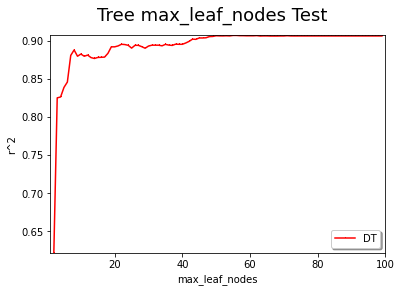

In [15]:
#finetuning max_leaf_nodes
number_of_points = 100
predictions = []
peak = -1
peak_num = 0

for x in range(2,number_of_points):
  reg_dt = tree.DecisionTreeRegressor(random_state=35, max_depth=8, min_samples_split=2, max_leaf_nodes=x)
  reg_dt.fit(norm_rtrain, rtrain_sln)
  val = reg_dt.predict(norm_rtest)
  predictions.append(metrics.r2_score(rtest_sln, val))
  if(metrics.r2_score(rtest_sln, val) > peak):
    peak = metrics.r2_score(rtest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)
print(predictions)

xvals = range(2,number_of_points)
plt.suptitle('Tree max_leaf_nodes Test',fontsize=18)
plt.xlabel('max_leaf_nodes')
plt.ylabel('r^2')
plt.plot(xvals,predictions,'r,-',label='DT')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()
#Max: 22 0.8899917089127672
#max_leaf_nodes=22 yields slights improvement

#test_size=0.3 
#Max: 41 0.8902783239117145
#decreases performance

#test_size=0.3 no "absolute_error"
#Max: 55 0.9067346699112808
#very slight improvement in this chain

Max: 12 0.9305633569907147
[0.5373395428163779, 0.6207731799568597, 0.7160706001829329, 0.8855268523195523, 0.788212458904735, 0.49497741332131207, 0.8134367185804924, 0.3555412147482635, 0.879541963726939, 0.8680518191516178, 0.8957710732497997, 0.9305633569907147, 0.9178201840888376, 0.8795772892785247, 0.8695997151887448, 0.7134692942022145, 0.8288543721330127, 0.7553380601171121, 0.896514791021913, 0.8785440025033352, 0.8558581475386569, 0.8117826885791458, 0.8923529782096961, 0.8730089563423308]


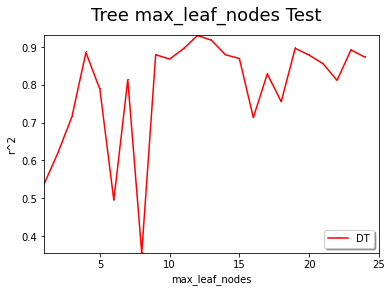

In [16]:
#finetuning max_features
number_of_points = 25
predictions = []
peak = -1
peak_num = 0

for x in range(1,number_of_points):
  reg_dt = tree.DecisionTreeRegressor(random_state=35, max_depth=8, min_samples_split=2, max_leaf_nodes=55, max_features=x)
  reg_dt.fit(norm_rtrain, rtrain_sln)
  val = reg_dt.predict(norm_rtest)
  predictions.append(metrics.r2_score(rtest_sln, val))
  if(metrics.r2_score(rtest_sln, val) > peak):
    peak = metrics.r2_score(rtest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)
print(predictions)

xvals = range(1,number_of_points)
plt.suptitle('Tree max_leaf_nodes Test',fontsize=18)
plt.xlabel('max_leaf_nodes')
plt.ylabel('r^2')
plt.plot(xvals,predictions,'r,-',label='DT')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()
#Max: 19 0.9219154417254792
#max_features=19 yields large improvement

#test_size=0.3 
#Max: 13 0.907808543576795
#decreases performance slightly

#comparision
#test_size=0.2
#best results 0.9219154417254792
#test_size=0.3 
#best results 0.9146885581721546
#0.2 scaled better with the different finetunings, but could "absolute_error" have made that difference?

#test_size=0.3 without "absolute_error"
#Max: 12 0.9305633569907147
#final settings: random_state=35, max_depth=8, min_samples_split=2, max_leaf_nodes=55, max_features=12

- **Analysis**: What did you determine? What did you notice? How did you identify which learning algorithms you will try and which important parameters you will tune for each one? What is your predictions for the 'competition testing set'.

Due to personal time contraints, I am unable to finetune more than one model for this stage of the process. My choice of which model to pursue finetuning with was solely driven by how high the base performance was. The result of this was the decision to finetune my decision tree model. During this, I came up with several interesting results. I changed all sorts of different parameters. I kept some in the process that did not change anything or that decreased performance, such as when I tested the different splitter setting. "best" always ended up with the best performance. Other parameters that were similar, I did not keep in the sequence. A lot of what seemed to be most worthwhile were parameters pertaining to node division and leaf nodes. What I thought was most interesting was discovered through increasing the testing set to 0.3 (3%). During this, "absolute_error" seemed to increase the performance; however, it seemed to limit how much of the finetuning process was actually worthwhile. In the end, the difference between using "absolute_error" with a test/train division of 7:3 versus the original test/train division of 8:2 was that the latter was able to benefit more from the finetuning that I did. Due to this interesting finding, I was led to restart the finetuning process, this time going with the default criterion. In the end, I found that the test/train division of 7:3 was actually able to outperform the test/train division of 8:2 by roughly 1%. I trust that my model will perform decently well for the 'competition testing set', but I believe I will be far from having the best performance.

# Part 2: Classification
How well can you predict `carbody`?

- **Metrics**: Identify which metrics you will be using to test your model, and say why they are appropriate. Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly?

For classification, the metrics are limited to accuracy and confusion matrix. For this investigation, I will mostly use accuracy. Like accuracy, confusion matrices are a measure of what the model gets right and wrong. The difference between these is that a confusion matrix is capable of informing *how* the model predicted incorrectly. Although confusion matrices give more information, it would be more difficult to use them in my way of finetuning. For this reason, I will stick to accuracy for most tests so that I will be able to create graphs which show how changing a variable changes accuracy. For this particular data, if I always guessed the average, I would imagine that I would predict things corretly maybe 1/4 of the time and up to 1/2 of the time. If I were to guess randomly, I would expect to be correct even less than that.


- **Initial Models**: Develop basic code for kNN, weighted kNN, and Decision Trees. Make some experiments here, including graphs to help you identify which algorithm and parameters may be best.

>As seen from the graphs below, the weighted kNN and decision tree performed the best. From the tests that were conducted, I found the optimal value for k for the kNN models and the optimal depth for the decision tree. Interestingly, both the weighed kNN and normal kNN show a local maxima after the overall max. Because the decision tree ended up performing the best, this investigation will focus on finetuning it to find the optimal parameters.


Max: 81 0.7142857142857143


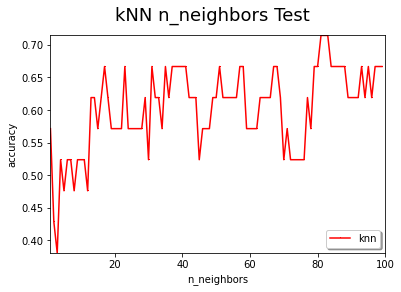

In [17]:
from sklearn import neighbors
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

#knn

number_of_points = 100
predictions = []
peak = -1
peak_num = 0

for x in range(1,number_of_points):
  class_knn = neighbors.KNeighborsClassifier(n_neighbors=x)
  class_knn.fit(norm_ctrain, ctrain_sln)
  val = class_knn.predict(norm_ctest)
  predictions.append(metrics.accuracy_score(ctest_sln, val))
  if(metrics.accuracy_score(ctest_sln, val) > peak):
    peak = metrics.accuracy_score(ctest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)

xvals = range(1,number_of_points)
plt.suptitle('kNN n_neighbors Test',fontsize=18)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.plot(xvals,predictions,'r,-',label='knn')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

Max: 18 0.7619047619047619


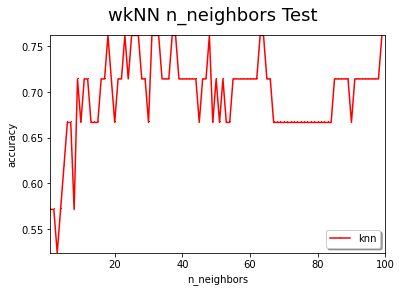

In [18]:
#wknn

number_of_points = 100
predictions = []
peak = -1
peak_num = 0

for x in range(1,number_of_points):
  class_knn = neighbors.KNeighborsClassifier(n_neighbors=x, weights='distance')
  class_knn.fit(norm_ctrain, ctrain_sln)
  val = class_knn.predict(norm_ctest)
  predictions.append(metrics.accuracy_score(ctest_sln, val))
  if(metrics.accuracy_score(ctest_sln, val) > peak):
    peak = metrics.accuracy_score(ctest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)

xvals = range(1,number_of_points)
plt.suptitle('wkNN n_neighbors Test',fontsize=18)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.plot(xvals,predictions,'r,-',label='knn')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

Max: 2 0.8571428571428571


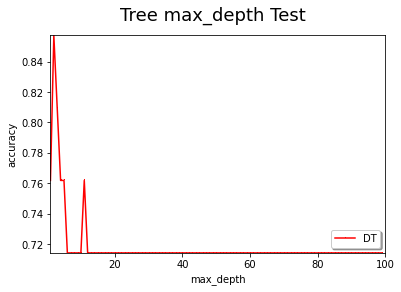

In [19]:
#dt

number_of_points = 100
predictions = []
peak = -1
peak_num = 0

for x in range(1,number_of_points):
  class_dt = tree.DecisionTreeClassifier(random_state=35, max_depth=x)
  class_dt.fit(norm_ctrain, ctrain_sln)
  val = class_dt.predict(norm_ctest)
  predictions.append(metrics.accuracy_score(ctest_sln, val))
  if(metrics.accuracy_score(ctest_sln, val) > peak):
    peak = metrics.accuracy_score(ctest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)

xvals = range(1,number_of_points)
plt.suptitle('Tree max_depth Test',fontsize=18)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.plot(xvals,predictions,'r,-',label='DT')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

#test_size=0.1
#Max: 2 0.8571428571428571

#test_size=0.2
#Max: 8 0.8048780487804879

#test_size=0.3
#Max: 2 0.7903225806451613

#test_size=0.4
#Max: 2 0.7682926829268293

- **Fine Tuning**: Create graphs to help you identify the **optimal** values of parameters you wish to use. Utilize different train/test splits. Full credit for thorough testing and documentation.


###The following section will be devoted to finetuning the decision tree model
####Findings:


test_size=0.1
---
---
---
random_state=35, max_depth=2

---
Max: 0.8571428571428571

---
---
random_state=35, criterion="entropy", max_depth=2

---
Max: 0.8571428571428571

---
---

test_size=0.2
---
---
---

random_state=35, max_depth=8

---

Max: 0.8048780487804879

---
---

random_state=35, criterion="entropy", max_depth=8, min_samples_split=18, min_samples_leaf=4, max_features=20

---

Max: 0.8048780487804879

In [20]:
#criterion

crit_options= ["gini", "entropy"]
predictions = []

for x in range(len(crit_options)):
  class_dt = tree.DecisionTreeClassifier(random_state=35, max_depth=2, criterion=crit_options[x])
  class_dt.fit(norm_ctrain, ctrain_sln)
  val = class_dt.predict(norm_ctest)
  predictions.append(metrics.accuracy_score(ctest_sln, val))
  

print(predictions)

#[0.8048780487804879, 0.7317073170731707]
#"gini" performs the best (default)

#test_size=0.1
#[0.8571428571428571, 0.8571428571428571]
#neither seem to perform better, but I may still test both

[0.8571428571428571, 0.8571428571428571]


Max: 2 0.8571428571428571


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Attempting to set identical bottom == top == 0.8571428571428571 results in singular transformations; automatically expanding.


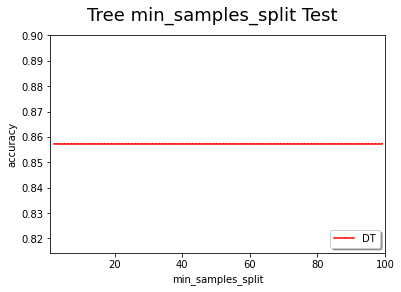

In [21]:
#finetuning min_samples_split

number_of_points = 100
predictions = []
peak = -1
peak_num = 0

for x in range(2,number_of_points):
  class_dt = tree.DecisionTreeClassifier(random_state=35, max_depth=2, min_samples_split=x)
  class_dt.fit(norm_ctrain, ctrain_sln)
  val = class_dt.predict(norm_ctest)
  predictions.append(metrics.accuracy_score(ctest_sln, val))
  if(metrics.accuracy_score(ctest_sln, val) > peak):
    peak = metrics.accuracy_score(ctest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)

xvals = range(2,number_of_points)
plt.suptitle('Tree min_samples_split Test',fontsize=18)
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.plot(xvals,predictions,'r,-',label='DT')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

#Max: 2 0.8048780487804879
#min_samples_split=2 performs the best (default)

#criterion="entropy"
#Max: 18 0.7560975609756098

#test_size=0.1
#Max: 2 0.8571428571428571
#no difference

#criterion="entropy"
#Max: 2 0.8571428571428571
#no difference

Max: 1 0.8571428571428571


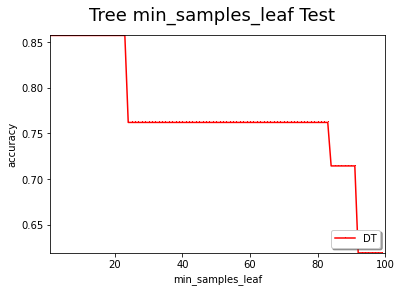

In [22]:
#finetuning min_samples_leaf

number_of_points = 100
predictions = []
peak = -1
peak_num = 0

for x in range(1,number_of_points):
  class_dt = tree.DecisionTreeClassifier(random_state=35, max_depth=2, min_samples_leaf=x)
  class_dt.fit(norm_ctrain, ctrain_sln)
  val = class_dt.predict(norm_ctest)
  predictions.append(metrics.accuracy_score(ctest_sln, val))
  if(metrics.accuracy_score(ctest_sln, val) > peak):
    peak = metrics.accuracy_score(ctest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)

xvals = range(1,number_of_points)
plt.suptitle('Tree min_samples_leaf Test',fontsize=18)
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.plot(xvals,predictions,'r,-',label='DT')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

#Max: 1 0.8048780487804879
#min_samples_leaf=1 performs best(default)

#criterion="entropy"
#Max: 4 0.7804878048780488

#test_size=0.1
#Max: 1 0.8571428571428571
#no difference

#criterion="entropy"
#Max: 1 0.8571428571428571
#no difference

Max: 18 0.8571428571428571


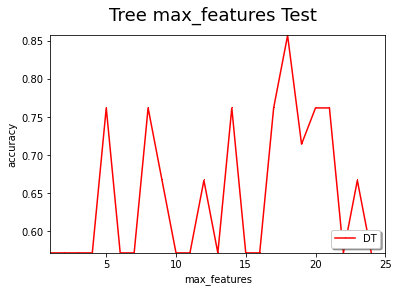

In [23]:
#finetuning max_features

number_of_points = 25
predictions = []
peak = -1
peak_num = 0

for x in range(1,number_of_points):
  class_dt = tree.DecisionTreeClassifier(random_state=35, max_depth=2, max_features=x)
  class_dt.fit(norm_ctrain, ctrain_sln)
  val = class_dt.predict(norm_ctest)
  predictions.append(metrics.accuracy_score(ctest_sln, val))
  if(metrics.accuracy_score(ctest_sln, val) > peak):
    peak = metrics.accuracy_score(ctest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)

xvals = range(1,number_of_points)
plt.suptitle('Tree max_features Test',fontsize=18)
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.plot(xvals,predictions,'r,-',label='DT')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

#Max: 15 0.8048780487804879
#max_features=15 performs best, but it may already be doing this as there is no actual improvement

#criterion="entropy"
#Max: 20 0.8048780487804879

#test_size=0.1
#Max: 18 0.8571428571428571
#no difference

#criterion="entropy"
#Max: 18 0.8571428571428571
#no difference

Max: 3 0.8571428571428571


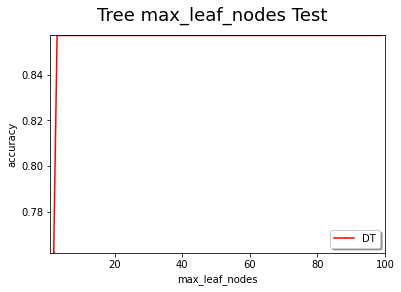

In [24]:
#finetuning max_leaf_nodes

number_of_points = 100
predictions = []
peak = -1
peak_num = 0

for x in range(2,number_of_points):
  class_dt = tree.DecisionTreeClassifier(random_state=35, max_depth=2, max_leaf_nodes=x)
  class_dt.fit(norm_ctrain, ctrain_sln)
  val = class_dt.predict(norm_ctest)
  predictions.append(metrics.accuracy_score(ctest_sln, val))
  if(metrics.accuracy_score(ctest_sln, val) > peak):
    peak = metrics.accuracy_score(ctest_sln, val)
    peak_num = x

print("Max:",peak_num,peak)

xvals = range(2,number_of_points)
plt.suptitle('Tree max_leaf_nodes Test',fontsize=18)
plt.xlabel('max_leaf_nodes')
plt.ylabel('accuracy')
plt.plot(xvals,predictions,'r,-',label='DT')
plt.legend(loc='lower right', shadow=True)
ymin = min(predictions)
ymax = max(predictions)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

#Max: 3 0.7560975609756098
#max_leaf_nodes=3 shows decreased performance

#criterion="entropy"
#Max: 5 0.7560975609756098
#no improvement

#test_size=0.1
#Max: 3 0.8571428571428571
#no difference

#criterion="entropy"
#Max: 3 0.8571428571428571
#no difference

In [25]:
#finetuning class_weight

options= ["balanced", None]
predictions = []

for x in range(len(options)):
  class_dt = tree.DecisionTreeClassifier(random_state=35, max_depth=2, class_weight=options[x])
  class_dt.fit(norm_ctrain, ctrain_sln)
  val = class_dt.predict(norm_ctest)
  predictions.append(metrics.accuracy_score(ctest_sln, val))
  

print(predictions)

#[0.7317073170731707, 0.8048780487804879]
#default parameters shows best performance

#criterion="entropy"
#[0.5365853658536586, 0.8048780487804879]
#default still best

#test_size=0.1
#[0.7142857142857143, 0.8571428571428571]
#default still best, disconinuing this test from here on out

[0.7142857142857143, 0.8571428571428571]


- **Analysis**: What did you determine? What did you notice? How did you identify which learning algorithms you will try and which important parameters you will tune for each one? What is your predictions for the 'competition testing set'.

I do not have great confidence in my classification model. I wonder if the performance boost I saw when I reduced the size of the test set came from the fact that less variety was shown. This can be seen from the confusion matrix below, in which two carbody classes, convertible and hardtop, are not found in the testing dataset at all. For the parameters I tried tuning, I used mostly the same as my regression decision tree since they had a lot of parameters in common. Unlike the regression decision tree, the classification decision did not get very affected by finetuning these parameters. For the 'competition testing set', I think my model will perform pretty poorly. I think that the performance of my model will look like the performance of my model before I changed the size of the testing set. 

Text(0.5, 0, 'Predicted label')

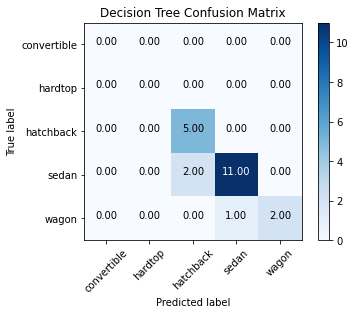

In [26]:
import itertools
import numpy as np

class_dt = tree.DecisionTreeClassifier(random_state=35, max_depth=2)
class_dt.fit(norm_ctrain, ctrain_sln)
val = class_dt.predict(norm_ctest)

cars = ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']


cm=metrics.confusion_matrix(ctest_sln,val,labels=cars)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.colorbar()
plt.xticks([0,1,2,3,4], class_dt.classes_,rotation=45)
plt.yticks([0,1,2,3,4], class_dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
plt.ylabel('True label')
plt.xlabel('Predicted label')

*don't forget to print out a confusion matrix*

# Part 3: Conclusions

**Bumps in the Road**: What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?

I did not encounter many challenges. One of the most difficult challenges was getting the confusion matrix to print out properly. At first, I did not understand why it was not correct at all. Some of classes were totallly missing values. Because of this, I first went and tried to seek help. While I was waiting for help, I decided to keep trying to fix it because I knew it had to be possible somehow. Due to the fact that I felt overwelmed by this problem, I knew that I needed to increase my knowledge base on what was happening in the code to produce a confusion matrix. I printed a lot of the variables out and I examined the API for sklearn to learn more about metrics.confusion_matrix. When looking at the documentation, I decided to mess around with the labels parameters because that seemed like the most likely solution to my intuition. Through this route, I was able to fix the way some data was not showing up at all. However, the confusion matrix was still incorrect. I was about ready to update my message seeking for help when I decided that I felt like I was so close to the final solution. Because I was printing out different variables, I was able to notice how the order of classes on the visualized confusion matrix was different from the order of classes in my variable I gave to the labels parameter. Because of this, I decided to change the order of classes I was giving to the labels parameter to the order of classes in the confusion matrix. It was this decision that produced the result that I was looking for. In all, changing my strategy for solving this problem aided me in solving the issue with the tools I had available.

**Conclusions:** What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

>If I were to do this project again, I would definitely recommend to myself that I do not entirely focus on the metrics. I think that, especially in the classification problem, it was a hinderance to me when deciding how to approach building my model. I also think that my focus on metrics also made me blind to why my decisions were changing the metrics. Through my experience in this project, I feel like I understand the affects of changing the ratio of training set:testing set a lot better. I would also recommend to myself to be more thourough in docummenting what final parameters I found to be best for a certain variation. I did a good job with that on the classification model, but I leave much room to be desired on the regression model. 

>Something that I thought was most interesting was how changing the criterion a model used could change the way other parameters I was tuning would affect the performance. In my regression model, during the middle of the whole process, I thought that "absolute_error" was going to turn out the best, but it turned out to scale less well with the parameters I was tuning. In the end, the default criterion turned out to interact with those parameters in a positive way more than my model which used "absolute_error". 

>I think that my best model is definitely the decision tree I built for the regression problem. I believe that it will generalize well enough to do well on the competition data set. The changes I put into my different variations of the model seemed to make significant differences. In this way, the model gives me more confidence because I felt like I had more of a hand in the process. I believe that my worst model is my decision tree for the classification problem. I think that reducing the size of the testing set to 0.1 was a bad decision. I think my time would have been better spent trying out finetuning on a different algorithm. I believe that my classification model will not generalize well for the competition data set.

>If I had more time I would definitely like to expand the scope of what I change. For example, I would have loved to mess around more with dropping different predictors from the dataset. In particular, I was curious if and how my decision to use the brand names for the cars affected how well the models were able to predict their target variables. I would also love to develop finetuning for all of the different algorithms for each problem. I wonder, like with the different critertion, if one algorithm would have changed more with the parameters I changed. I especially wonder if this could be the case for the classification problem. My experience with changing the criterion parameter taught me that aiming for the highest metric will not always yield the results that you desire.